In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools


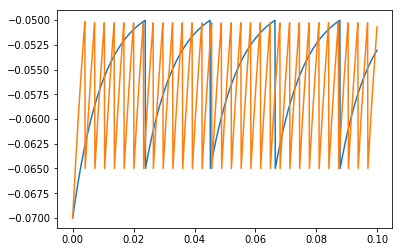

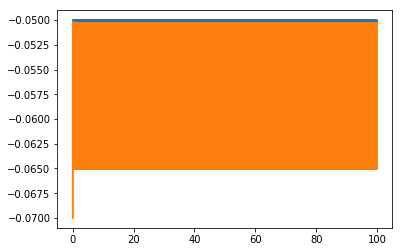

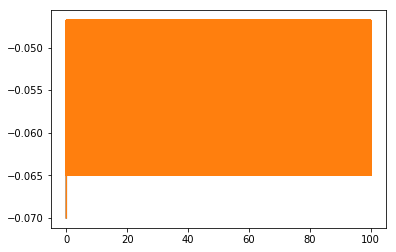

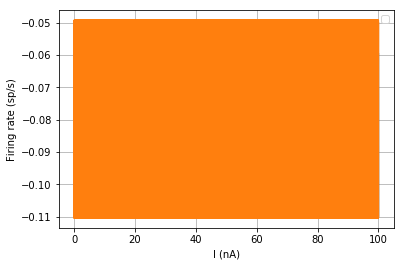

In [6]:
v_rest= -70*b2.mV #EL
v_reset= -65*b2.mV #Vreset
membrane_resistance = 100 * b2.Mohm #RM
membrane_capacitance = 0.1*b2.nF #CM
firing_threshold = -50 * b2.mV #VL
refractory_time = 2.5*b2.ms

refractory_time_0 =  2.5*b2.ms
tau_refractory =  1.0*b2.ms
Vth_reset =  200*b2.mV

tau_refractory =  1.0*b2.ms
Vth_reset =  200*b2.mV

E_k = -80*b2.mV
tau_Gref = 0.2*b2.ms
deltaG = 2*b2.usiemens
Gref_0 = 0*b2.siemens

simulation_time = 10
dt =  0.1 * b2.ms 

current = [220, 600]
v_reset_high = 50*b2.mV

#
eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) ) : volt
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset_high; v=v_reset", threshold="v>firing_threshold",
    refractory=False, method="euler", dt=dt)
neuron.v = v_rest  # set initial value
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

plt.figure(1)
plt.plot(state_monitor.t,state_monitor.v[0]/b2.mV) 
plt.plot(state_monitor.t,state_monitor.v[1]/b2.mV) 

print("oi")
eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) ) : volt (unless refractory)
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset_high; v=v_reset", threshold="v>firing_threshold",
    refractory=refractory_time, method="euler")

neuron.v = v_rest  # set initial value
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

plt.figure(2)
plt.plot(state_monitor.t,state_monitor.v[0]) 
plt.plot(state_monitor.t,state_monitor.v[1]) 

#
eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) ) : volt 
dVth/dt = (firing_threshold - Vth)/tau_refractory :  volt
current : amp
"""

# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset_high; v=v_reset; Vth=Vth_reset", threshold="v>Vth",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Vth = firing_threshold
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "Vth"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

plt.figure(3)
plt.plot(state_monitor.t,state_monitor.v[0]) 
plt.plot(state_monitor.t,state_monitor.v[1]) 

#
eqs = """
dGref/dt = -Gref/tau_Gref : siemens
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (Gref *(E_k - v))/membrane_capacitance + (current/membrane_capacitance) ) : volt
dVth/dt = (firing_threshold - Vth)/tau_refractory :  volt
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset_high; Vth=Vth_reset; Gref=Gref+deltaG", threshold="v>Vth",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Vth = firing_threshold
neuron.Gref = Gref_0
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "Vth", "Gref"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

plt.figure(4)
plt.plot(state_monitor.t,state_monitor.v[0]) 
plt.plot(state_monitor.t,state_monitor.v[1]) 

plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.grid()
plt.legend()


plt.show()
